In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def logistic(r, x):
    return r * x * (1 - x)

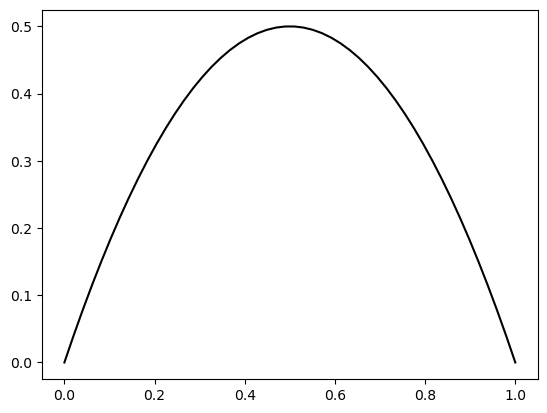

In [3]:
x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, logistic(2, x), 'k')

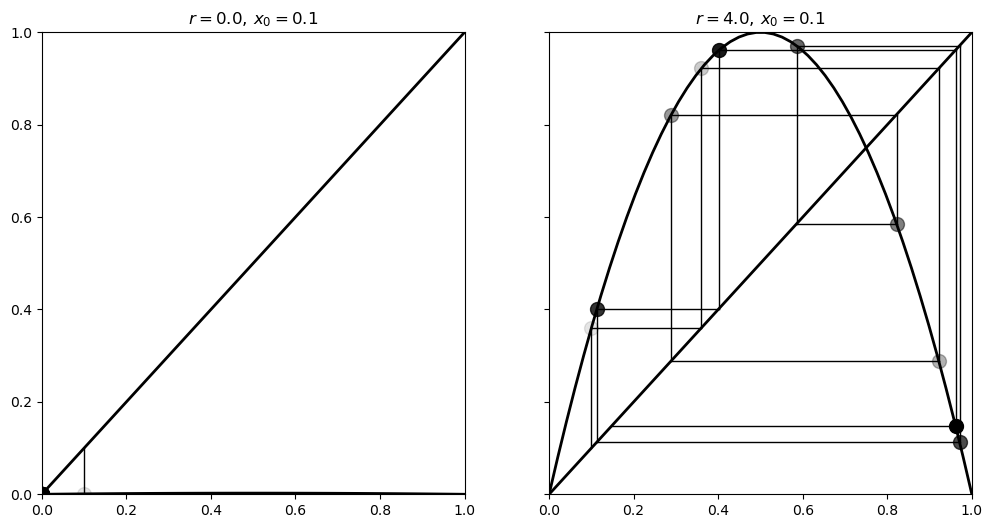

In [4]:
def plot_system(r, x0, n, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = logistic(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
plot_system(0.01, .1, 10, ax=ax1)
plot_system(4, .1, 10, ax=ax2)

In [116]:
n = 10000
r = np.linspace(0.01, 4, n)

In [117]:
iterations = 1000
last = 100

In [118]:
x = 1e-5 * np.ones(n)

In [119]:
lyapunov = np.zeros(n)

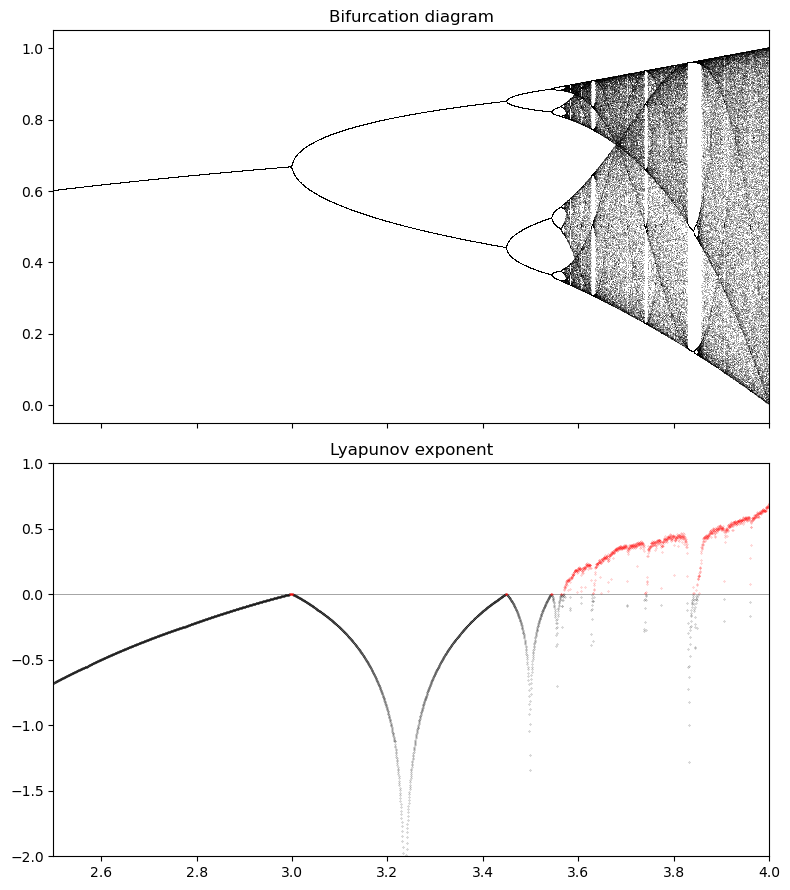

In [120]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()

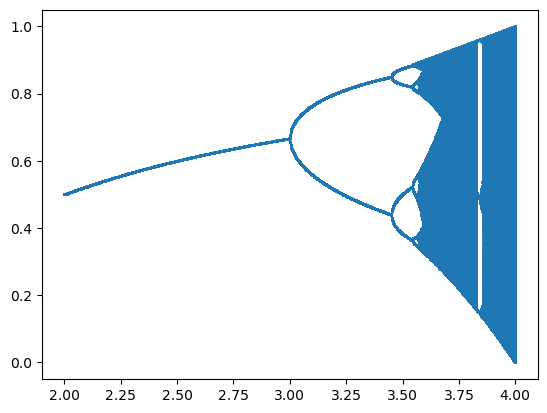

In [104]:
# matplotlib.pyplot - do rysowania wykresow
# numpy - do generowania rownomiernie rozlozonej listy liczb
# Set - do przechowywania listy punktow na wykres

import matplotlib.pyplot as plt
import numpy as np
#from sets import Set


# Funkcja do obliczania mapy logistycznej - zwraca liste od x(1) do x(n)
def logistic_map(n, x0, r):
    x = x0
    values = []
    for i in range(n):
        x = r*x*(1-x)
        values.append(x)
    return values

# Zbior punktow wykresu
bif_diagram =[]

# Ile pierwszych krokow odrzucamy
minsteps = 5000
# Ile krokow wykonujemy
steps = 10000
# Warunek poczatkowy
x0 = 0.5
# Przestrzen parametru R - 2001 liczb rozlozonych rownomiernie od 2 do 4
r_space = np.linspace(2, 4, 1000)

# Dla kazdego "R":
for r in r_space:
    # Drukujemy "R"
    #print(r)
    # Obliczamy mape logistyczna
    points_array = logistic_map(steps, x0, r)
    # Odrzucamy pierwsze 5000 (minsteps) krokow
    points_array = points_array[minsteps:]
    # Dodajemy punkty do wykresu
    for y in points_array:
        bif_diagram.append((r, y))

r_array = []
y_array = []

# Rozdzielamy zbior punktow na liste wspolrzednych "r" i "y"
for point in bif_diagram:
    (r, y) = point
    r_array.append(r)
    y_array.append(y)

# Rysujemy rezultat

plt.plot(r_array, y_array, '.', markersize=1)

# trzecie

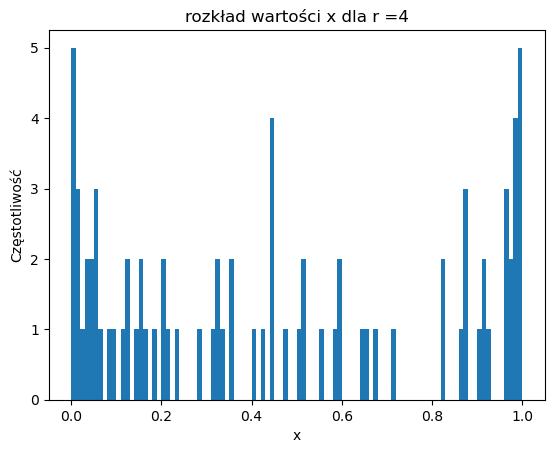

In [115]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(r,x):
    return r*x*(1-x)

n = 100
r = 4
x = 0.1
i = 80 #iteracje
X = [] #wartosci x

for i in range(iterations):
    x = logistic(r, x)
    X.append(x)

plt.hist(X, bins=100)
plt.xlabel('x')
plt.ylabel('Częstotliwość')
plt.title(f'rozkład wartości x dla r ={r}')
plt.show()